In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


# Load prepared data

In [54]:
save_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/raw/"

## fmap mean all experiments

In [55]:
file_mean = save_path+"fmap_mean.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [56]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 272.3 MB


## 55 fmap means

In [7]:
arr = [4, 6, 8, 10, 12]
col = []
for i in range(len(arr)):
    for j in range(1, 12):
        name = str(arr[i])+'_'+str(j+1)+'m'+str(j)
        col.append(name)

In [8]:
file_name = save_path+"fmap_mean_55.txt"
columns = ['exp', 'mini_exp', 'i', 'j', 'k']
for i in range(len(col)): 
    columns.append(col[i])
columns.append('theory')
data = np.loadtxt(file_name);

In [9]:
df_55 = pd.DataFrame(data, columns=columns)
df_55 = df_55.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df_55

,exp,mini_exp,i,j,k,4_2m1,4_3m2,4_4m3,4_5m4,4_6m5,...,12_4m3,12_5m4,12_6m5,12_7m6,12_8m7,12_9m8,12_10m9,12_11m10,12_12m11,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_55.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 61 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   4_2m1     float64
 6   4_3m2     float64
 7   4_4m3     float64
 8   4_5m4     float64
 9   4_6m5     float64
 10  4_7m6     float64
 11  4_8m7     float64
 12  4_9m8     float64
 13  4_10m9    float64
 14  4_11m10   float64
 15  4_12m11   float64
 16  6_2m1     float64
 17  6_3m2     float64
 18  6_4m3     float64
 19  6_5m4     float64
 20  6_6m5     float64
 21  6_7m6     float64
 22  6_8m7     float64
 23  6_9m8     float64
 24  6_10m9    float64
 25  6_11m10   float64
 26  6_12m11   float64
 27  8_2m1     float64
 28  8_3m2     float64
 29  8_4m3     float64
 30  8_5m4     float64
 31  8_6m5     float64
 32  8_7m6     float64
 33  8_8m7     float64
 34  8_9m8     float64
 35  8_10m9    float64
 36  8_11m10 

## Only +ON and -ON

In [11]:
file_name = save_path+"fmap_on.txt"
columns =['exp', 'mini_exp', 'run', 'i', 'j', 'k', 'off', 'on', 'theory']
data = np.loadtxt(file_name);

In [12]:
df_on = pd.DataFrame(data, columns=columns)
df_on = df_on.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int, "run":int})
df_on

,exp,mini_exp,run,i,j,k,off,on,theory
0,36,1,1,0,0,0,0.0,0.0,0.0
1,36,1,1,0,0,1,0.0,0.0,0.0
2,36,1,1,0,0,2,0.0,0.0,0.0
3,36,1,1,0,0,3,0.0,0.0,0.0
4,36,1,1,0,0,4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6488059,38,6,-1,43,63,59,0.0,0.0,0.0
6488060,38,6,-1,43,63,60,0.0,0.0,0.0
6488061,38,6,-1,43,63,61,0.0,0.0,0.0
6488062,38,6,-1,43,63,62,0.0,0.0,0.0


In [13]:
df_on.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6488064 entries, 0 to 6488063
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   run       int64  
 3   i         int64  
 4   j         int64  
 5   k         int64  
 6   off       float64
 7   on        float64
 8   theory    float64
dtypes: float64(3), int64(6)
memory usage: 445.5 MB


# Split data

## Data 1. fmap mean all experiments

In [14]:
X = df.iloc[:, 2:-1].values  # include i,j,k
y = df['theory'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [15]:
print(X.shape)
print(y.shape)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(3244032, 8)
(3244032,)
(2270822, 8)
(2270822,)
(973210, 8)
(973210,)


## Data2: One experiment

In [16]:
df_train = df[(df['exp']==38) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==38) & (df['mini_exp']==6)]

In [17]:
X2_train = df_train.iloc[:, 2:-1].values
y2_train = df_train['theory'].values

X2_test = df_test.iloc[:, 2:-1].values
y2_test = df_test['theory'].values

In [18]:
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(901120, 8)
(901120,)
(180224, 8)
(180224,)


## Data3: 55 fmap means

In [19]:
arr = [4, 6, 8, 10, 12]
col = []
for i in range(len(arr)):
    for j in range(1, 12):
        name = str(arr[i])+'_'+str(j+1)+'m'+str(j)
        col.append(name)

In [20]:
X = df_55.iloc[:, 2:-1].values  # include i,j,k
y = df_55['theory'].values

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [21]:
print(X.shape)
print(y.shape)
print(X3_train.shape)
print(y3_train.shape)
print(X3_test.shape)
print(y3_test.shape)

(3244032, 58)
(3244032,)
(2270822, 58)
(2270822,)
(973210, 58)
(973210,)


## Data4: Only +ON and -ON

In [22]:
X = df_on.iloc[:, 2:-1].values  # include i,j,k
y = df_on['theory'].values

X4_train, X4_test, y4_train, y4_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [23]:
print(X.shape)
print(y.shape)
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape)

(6488064, 6)
(6488064,)
(4541644, 6)
(4541644,)
(1946420, 6)
(1946420,)


# Neural Network

## Data1: fmap means all experiments

In [25]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [26]:
model = keras.Sequential()
model.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
model.add(Dense(1))
#
model.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_data=[X_test, y_test])

2022-10-21 10:10:05.135546: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))

70964/70964 [==============================] - 49s 689us/step
35.44075201543276
30413/30413 [==============================] - 21s 693us/step
43.239436517624036


In [28]:
model.evaluate(X_test, y_test)

30413/30413 [==============================] - 26s 856us/step - loss: 43.2395 - accuracy: 0.8082


[43.23946762084961, 0.8082325458526611]

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [30]:
history.history

{'loss': [73.36885833740234,
  42.62114334106445,
  40.05806350708008,
  39.06209945678711,
  38.528690338134766,
  38.27510070800781,
  37.9068603515625,
  37.80840301513672,
  37.60513687133789,
  37.13703155517578,
  36.87487030029297,
  36.78592300415039,
  36.58909606933594,
  36.49448776245117,
  36.482154846191406,
  36.66824722290039,
  36.588619232177734,
  36.43455505371094,
  36.60725021362305,
  36.343753814697266],
 'accuracy': [0.6967635750770569,
  0.5390585660934448,
  0.5720668435096741,
  0.6192092299461365,
  0.6660196185112,
  0.6787520051002502,
  0.6856045722961426,
  0.7029982805252075,
  0.7156553864479065,
  0.7444850206375122,
  0.7870088219642639,
  0.7858524322509766,
  0.7918300032615662,
  0.7915578484535217,
  0.7889759540557861,
  0.7881524562835693,
  0.7901042103767395,
  0.7921514511108398,
  0.7931388020515442,
  0.790308952331543],
 'val_loss': [48.8962516784668,
  52.63041687011719,
  49.84742736816406,
  44.59315490722656,
  47.20351791381836,
  4

## Plot

### Loss function (MSE)

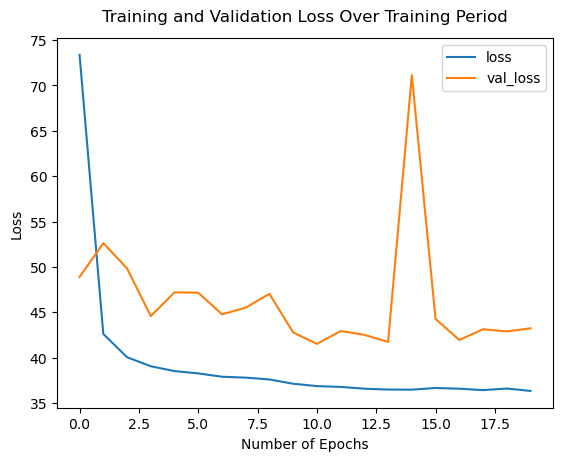

In [31]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

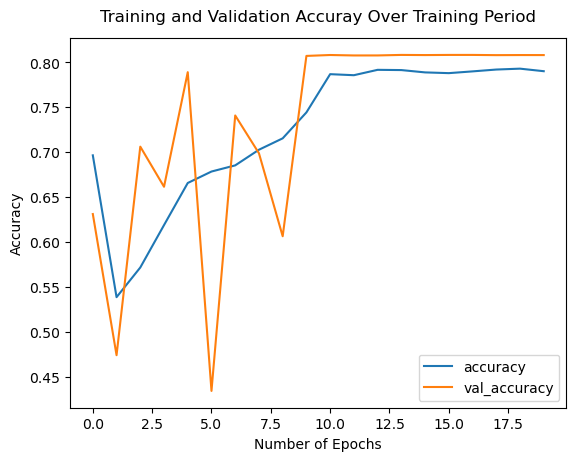

In [32]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

In [1]:
plt.scatter(y_test, test_pred,  color='black')
plt.plot(y_test, test_pred, color='green', linewidth=2)

NameError: name 'plt' is not defined

In [ ]:
acc = (np.sum(y_test == test_pred).astype(np.float) / X_test.shape[0])

print('Test accuracy: %.2f%%' % (acc * 100))

In [ ]:
test_pred

## Data2: One experiment

In [62]:
X_train = X2_train
y_train = y2_train
X_test = X2_test
y_test = y2_test

In [25]:
model2 = keras.Sequential()
model2.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
model2.add(Dense(1))
#
model2.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=20, verbose=0, validation_data=[X_test, y_test])


2022-10-21 10:46:04.018021: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
train_pred2 = model2.predict(X_train)
print(mse(train_pred2, y_train))
test_pred2 = model2.predict(X_test)
print(mse(test_pred2, y_test))

28160/28160 [==============================] - 18s 643us/step
61.05190138161765
5632/5632 [==============================] - 4s 648us/step
61.0641557898276


In [27]:
model2.evaluate(X_test, y_test)

5632/5632 [==============================] - 4s 750us/step - loss: 61.0641 - accuracy: 0.8066


[61.064125061035156, 0.8065629601478577]

In [28]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [29]:
history2.history

{'loss': [145.31422424316406,
  77.03971099853516,
  71.23352813720703,
  67.2251205444336,
  66.1454849243164,
  65.33475494384766,
  64.87650299072266,
  64.96411895751953,
  64.14990997314453,
  64.17617797851562,
  64.12557220458984,
  64.18975830078125,
  64.02726745605469,
  63.56928253173828,
  63.85491943359375,
  63.60580062866211,
  63.26496887207031,
  63.243160247802734,
  63.377803802490234,
  63.18996810913086],
 'accuracy': [0.6301202774047852,
  0.7314275503158569,
  0.6389071345329285,
  0.6592329740524292,
  0.6890325546264648,
  0.725451648235321,
  0.7523237466812134,
  0.7578158378601074,
  0.765625,
  0.7702292799949646,
  0.7719271779060364,
  0.7723233103752136,
  0.7706698179244995,
  0.7757645845413208,
  0.7791548371315002,
  0.7789750695228577,
  0.7766190767288208,
  0.7792635560035706,
  0.7836747765541077,
  0.7822365760803223],
 'val_loss': [89.80615234375,
  73.20452880859375,
  67.51643371582031,
  63.665138244628906,
  105.89242553710938,
  63.7403564

## Plot

### Loss function (MSE)

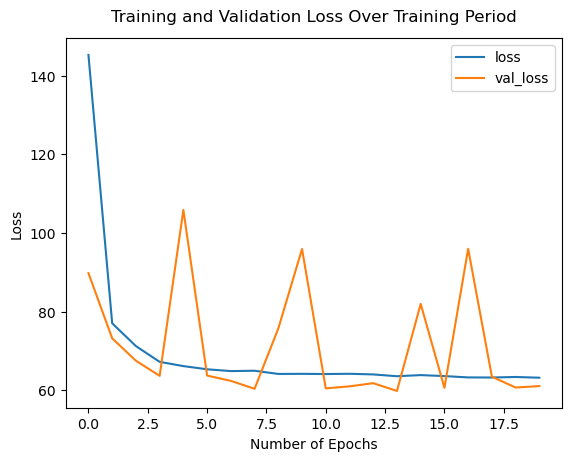

In [30]:
model_df = pd.DataFrame(history2.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

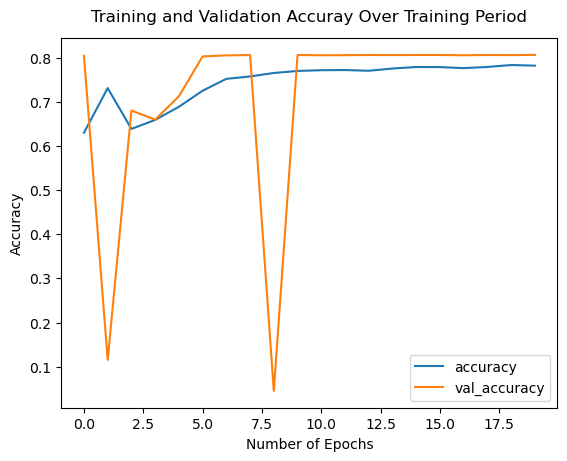

In [31]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

(0.0, 100.0, 0.0, 100.0)

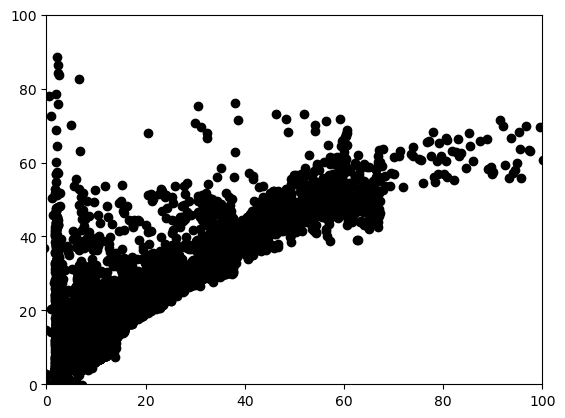

In [65]:

plt.scatter(y_test, test_pred2,  color='black')
plt.axis([0,100, 0, 100])
#plt.plot(y_test, test_pred2, color='green', linewidth=2)

In [ ]:
test_pred2

In [58]:
max(df_test['theory'])

769.738220215

## Data3: 55 fmap means

In [33]:
X_train = X3_train
y_train = y3_train
X_test = X3_test
y_test = y3_test

In [34]:
model3 = keras.Sequential()
model3.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
model3.add(Dense(1))
#
model3.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=20, verbose=0, validation_data=[X_test, y_test])


In [35]:
train_pred3 = model3.predict(X_train)
print(mse(train_pred3, y_train))
test_pred3 = model3.predict(X_test)
print(mse(test_pred3, y_test))

70964/70964 [==============================] - 45s 632us/step
68.77916304603048
30413/30413 [==============================] - 19s 627us/step
72.2654945878932


In [36]:
model3.evaluate(X_test, y_test)

30413/30413 [==============================] - 23s 741us/step - loss: 72.2655 - accuracy: 6.0624e-05


[72.2655258178711, 6.062411921448074e-05]

In [37]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                1180      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [38]:
history3.history

{'loss': [424.44866943359375,
  52.18746566772461,
  51.95429611206055,
  52.74146270751953,
  52.98725891113281,
  53.29958724975586,
  53.16404724121094,
  52.7490234375,
  50.758277893066406,
  52.65450668334961,
  51.552188873291016,
  52.617671966552734,
  53.788509368896484,
  51.86954116821289,
  54.698970794677734,
  53.814910888671875,
  54.32284927368164,
  53.93813705444336,
  60.74116897583008,
  58.160919189453125],
 'accuracy': [0.19938991963863373,
  0.05913321301341057,
  0.0845579281449318,
  0.22490622103214264,
  0.0676451101899147,
  0.1753215342760086,
  0.06831182539463043,
  0.14271968603134155,
  0.07882960140705109,
  0.05445164814591408,
  0.03953986614942551,
  0.05900947004556656,
  0.06043890863656998,
  0.04243529587984085,
  0.07458136230707169,
  0.0736151933670044,
  0.054844897240400314,
  0.07133672386407852,
  0.0954161062836647,
  0.09563849866390228],
 'val_loss': [55.899784088134766,
  88.07706451416016,
  51.993961334228516,
  53.2925910949707,
 

## Plot

### Loss function (MSE)

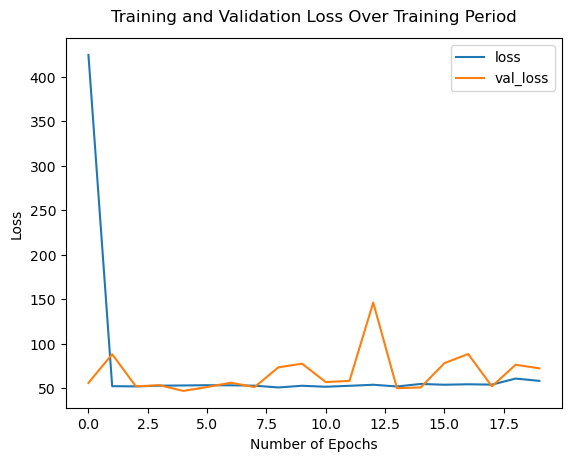

In [39]:
model_df = pd.DataFrame(history3.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

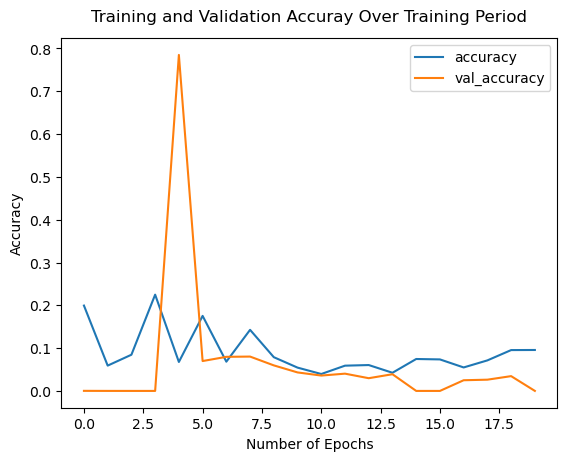

In [40]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

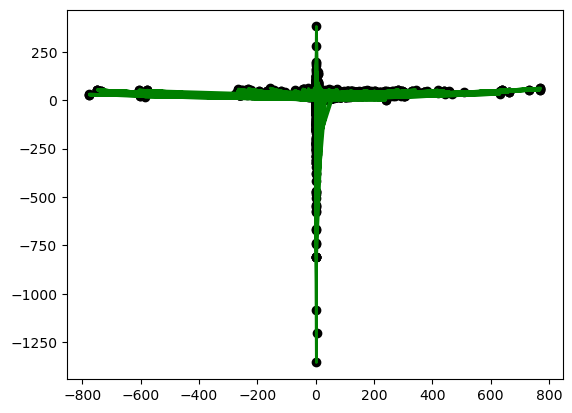

In [41]:
plt.scatter(y_test, test_pred3,  color='black')
plt.plot(y_test, test_pred3, color='green', linewidth=2)

## Data4: +ON and -ON

In [42]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [43]:
model4 = keras.Sequential()
model4.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
model4.add(Dense(1))
#
model4.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=20, verbose=0, validation_data=[X_test, y_test])


In [44]:
train_pred4 = model4.predict(X_train)
print(mse(train_pred4, y_train))
test_pred4 = model4.predict(X_test)
print(mse(test_pred4, y_test))

141927/141927 [==============================] - 88s 619us/step
39.73835734703439
60826/60826 [==============================] - 38s 632us/step
41.96294873748612


In [45]:
model4.evaluate(X_test, y_test)

60826/60826 [==============================] - 45s 741us/step - loss: 41.9632 - accuracy: 0.6654


[41.96320343017578, 0.6654226779937744]

In [46]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                140       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [47]:
history4.history

{'loss': [51.56545639038086,
  44.62747573852539,
  43.859405517578125,
  43.12508010864258,
  42.8978271484375,
  42.78590393066406,
  42.58470916748047,
  42.47372817993164,
  42.43391799926758,
  42.53626251220703,
  42.26179885864258,
  42.27949523925781,
  41.985958099365234,
  42.02499771118164,
  42.05527877807617,
  42.050254821777344,
  42.0495719909668,
  41.9505500793457,
  41.859764099121094,
  41.87369918823242],
 'accuracy': [0.6554800271987915,
  0.6125836968421936,
  0.6082808375358582,
  0.6149914264678955,
  0.6232080459594727,
  0.626397430896759,
  0.6293062567710876,
  0.6297336220741272,
  0.6336044669151306,
  0.6324621438980103,
  0.6334171295166016,
  0.634300708770752,
  0.6374412178993225,
  0.6382600665092468,
  0.638846218585968,
  0.6393043994903564,
  0.6390018463134766,
  0.6395168900489807,
  0.6402833461761475,
  0.6400572061538696],
 'val_loss': [45.802162170410156,
  51.937313079833984,
  43.757896423339844,
  43.60121154785156,
  41.72332763671875,


## Plot

### Loss function (MSE)

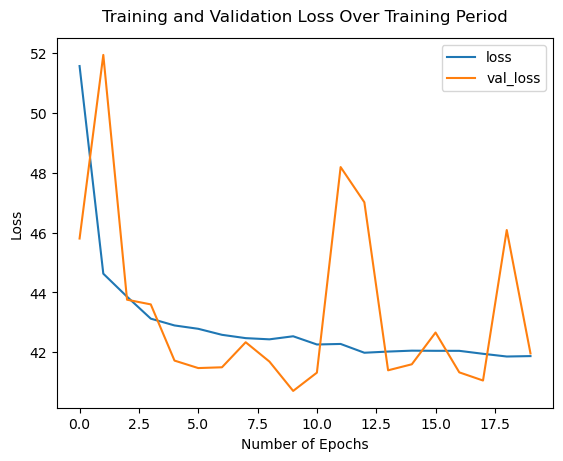

In [48]:
model_df = pd.DataFrame(history4.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

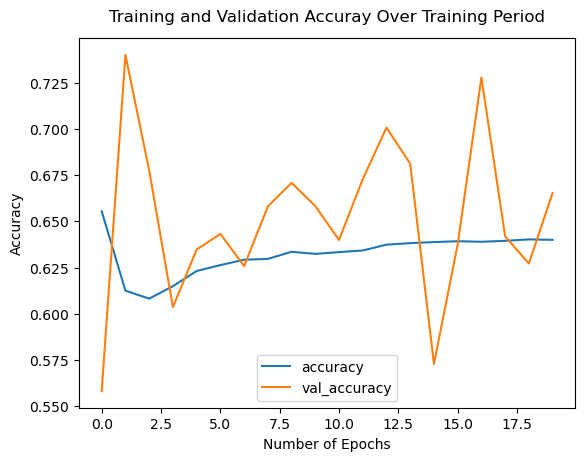

In [49]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

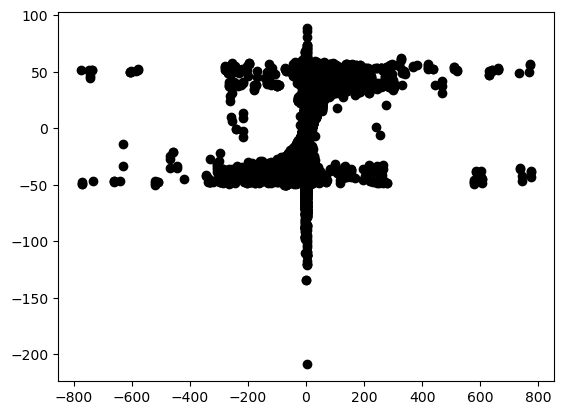

In [51]:
plt.scatter(y_test, test_pred4,  color='black')

# Output image data

In [115]:
df['predict'] = test_pred
df_test['predict'] = test_pred2
df_55['predict'] = test_pred3
df_on['predict'] = test_pred4

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_3032/2079570890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = test_pred
/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_3032/2079570890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict2'] = test_pred2


In [116]:
np.savetxt(save_path+"nn.txt", df[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [117]:
np.savetxt(save_path+"nn2.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
np.savetxt(save_path+"nn3.txt", df_55[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
np.savetxt(save_path+"nn4.txt", df_on[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")